# CSE391 
## Assignment 2
##  Due: April 20th at 11:59 pm

Data Science 





This dataset provides crime reports from San Francisco's neighborhoods in 2014. Please explore the data and check what is inside.

Tasks:
1.	Predict the category of the crime based on the time and location information.     


What to use:
You can use any models (regressions, classification, clustering and/or their combinations). 
Please use  Python.  


Data fields Description:
- Dates - timestamp of the crime incident
- Category - category of the crime incident. This is the target variable you are going to predict. Descript - - detailed description of the crime incident
- PdDistrict - name of the Police Department District
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude




In [135]:
%matplotlib inline
import colorsys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.utils import shuffle

plt.style.use(['seaborn-whitegrid','seaborn-bright'])

data = pd.read_csv('/home/ealvarez/Documents/SBU/CSE 391/data_set.csv',parse_dates = ['Dates'])
data.dropna(inplace=True)
print(data.shape)
data.head(10)

(67725, 7)


,Dates,Category,Descript,PdDistrict,Address,X,Y
0,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,MISSION,4100 Block of 18TH ST,-122.435563,37.760801
2,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834
3,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
4,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
6,2014-12-28 23:30:00,WARRANTS,WARRANT ARREST,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
7,2014-12-28 23:30:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
8,2014-12-28 23:28:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",BAYVIEW,800 Block of JAMESTOWN AV,-122.391150,37.717223
9,2014-12-28 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,CENTRAL,POST ST / JONES ST,-122.413358,37.787664
10,2014-12-28 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,SOUTHERN,HOWARD ST / 8TH ST,-122.411610,37.776221
11,2014-12-28 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,CENTRAL,BUSH ST / STOCKTON ST,-122.407152,37.790366


## Some visualization on the data to see how it looks!

## As we can see we have too many crimes that barely appear in the spectrum and are barely noticeable. We can group the crimes that barely appear into one group.

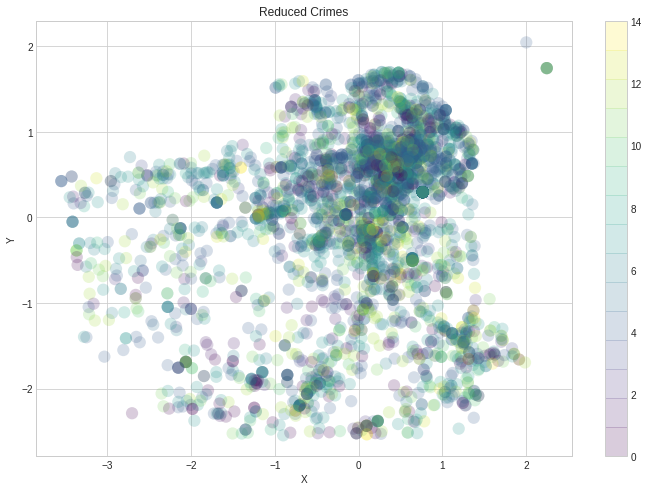

In [162]:
# We select the row where category appears less then 700 times and set the category to 'OTHER OFFENCES'
data.loc[data.groupby('Category')['Category'].transform('size') < 700,'Category'] = 'OTHER OFFENSES'

encoder = preprocessing.LabelEncoder()                 # Encoder used to turn categories into integer values

categories = encoder.fit_transform(data.Category)      # Turning them into numerical values
categories = pd.DataFrame(categories)                  # Encode the categorie data
X = pd.DataFrame(preprocessing.scale(data.X))          # Normalize the X values
Y = pd.DataFrame(preprocessing.scale(data.Y))          # Normalize the X values

new_data = pd.concat([X,Y,categories], axis=1)         # We make a new dataframe with our new values
new_data.columns = ['X', 'Y', 'categories']

shrink = new_data.sample(frac=0.05)           # Here we can see how the categories are scattered over the X and Y axis but we take a smaller sample 

plt.figure(figsize=(12,8))
#for i in range(15):
#    cur = colorsys.hsv_to_rgb(np.random.uniform(low=0.0, high=1), np.random.uniform(low=0.2, high=1),np.random.uniform(low=0.9, high=1))
#    plt.scatter(shrink[shrink['categories'] == i].X, shrink[shrink['categories'] == i].Y, c=cur, edgecolor='none')
plt.scatter(shrink.X, shrink.Y, c=shrink.categories, edgecolor='none', alpha=0.2, s=150, cmap=plt.cm.get_cmap('viridis', 15))
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reduced Crimes')
plt.show();

## I want the data to have numerical values since I want to use the Naive Bayes algorithm as a classifier, for now I'll strip away the address and description data since I would have to parse them to convert them into a meaningful numerical value, I got four other homeworks and the final project due by next week so I'm good =D
-  For the rest of the string values I will turn them into binary values.
-  For the date I will extract the day, month and hour of the say (turn month and day into binary data).
-  Last but not least I think it will be wise to normalize the X and Y values.
-  For the label which is the category, I will convert it to numerical values using an encoder.

In [142]:
# Here we will extract the values from Dates
month = pd.get_dummies(data.Dates.dt.strftime("%B"))   # Extract month by string then binary
day = pd.get_dummies(data.Dates.dt.strftime('%A'))     # Day
hour = pd.get_dummies(data.Dates.dt.hour)              # Hour
district = pd.get_dummies(data.PdDistrict)

# I get the names of the columns so that I can plot things more easily
month_names = list(month) 
day_names = list(day)
district_names = list(district)

# Reseting the index helps concatinate because we know that this point the number of rows and order are the same 
new_data.reset_index(drop=True, inplace=True)
month.reset_index(drop=True, inplace=True)
day.reset_index(drop=True, inplace=True)
hour.reset_index(drop=True, inplace=True)
district.reset_index(drop=True, inplace=True)

# I concatiate all my numerical data and now we can input this to the model
new_data = pd.concat([new_data, month, day, hour, district], axis=1)
new_data.head(10)

,X,Y,categories,April,August,December,February,January,July,June,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-0.494218,-0.322890,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.397477,0.778145,12,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.048237,0.220162,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.048237,0.220162,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.048237,0.220162,13,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.048237,0.220162,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1.243840,-2.165948,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0.374749,0.813220,4,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0.443167,0.329269,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.617610,0.927491,4,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Now that we have this data we can easily make different type of charts to better visualize the data

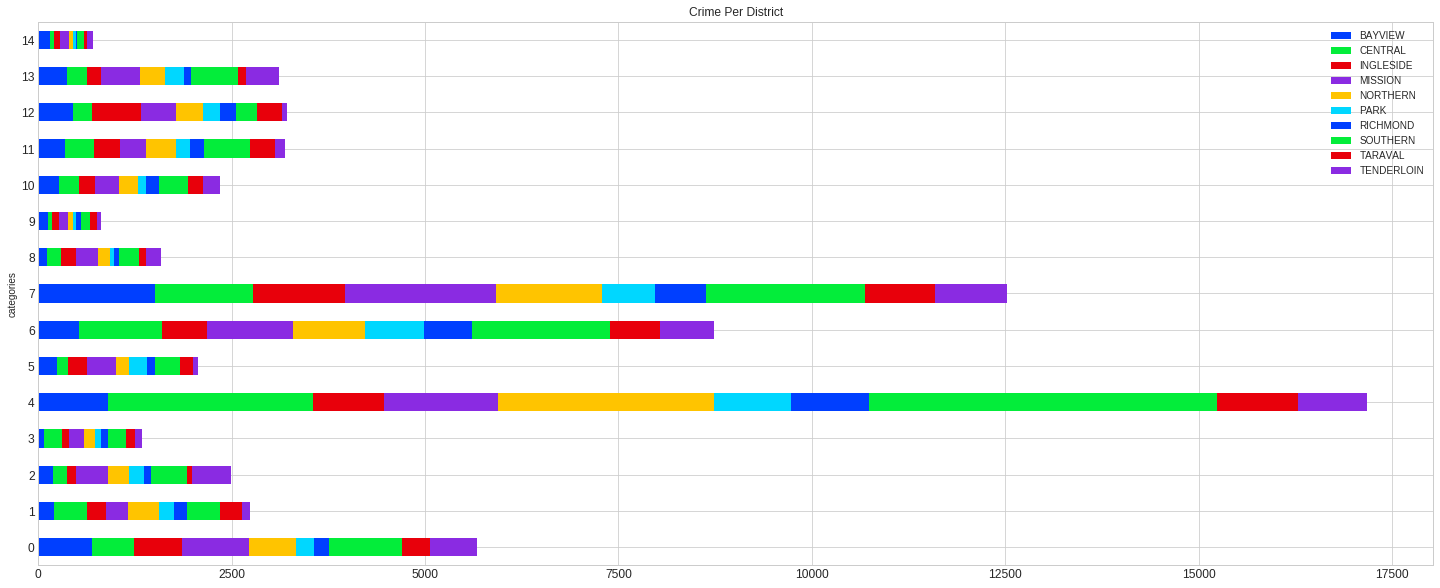

In [148]:
table = pd.pivot_table(new_data, index=['categories'], values=district_names, aggfunc=np.sum)
ax = table.plot(kind='barh', title ="Crime Per District", figsize=(25, 10), legend=True, fontsize=12,stacked=True)
plt.show()

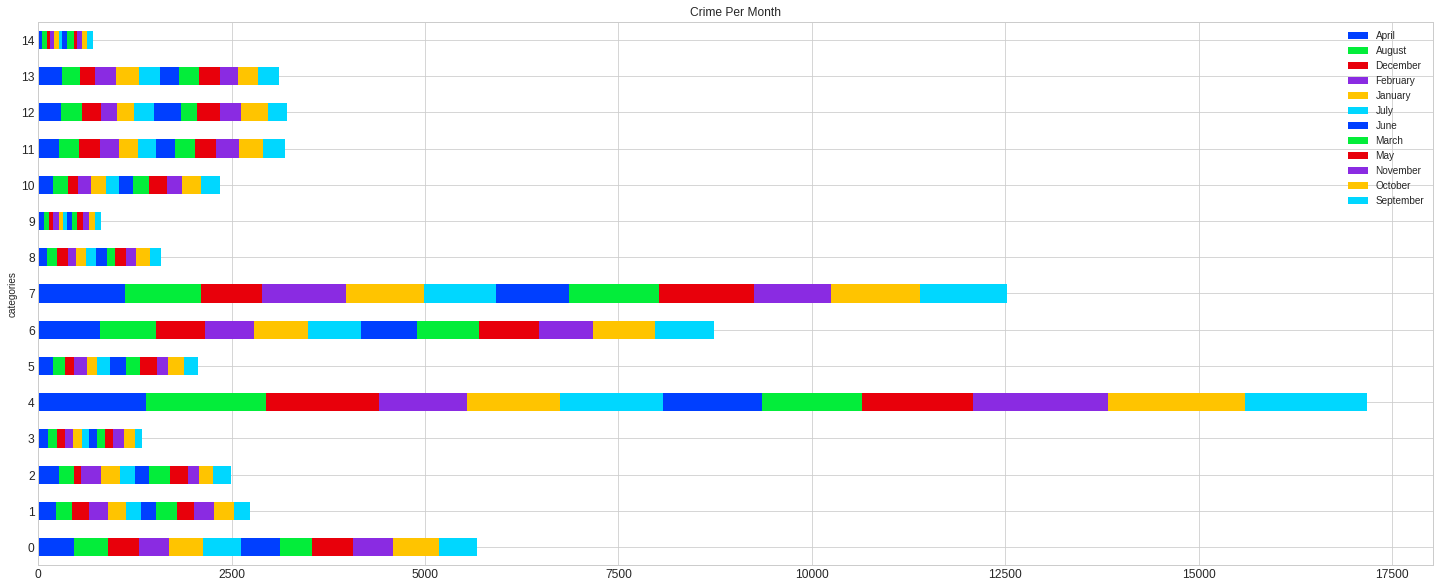

In [149]:
table = pd.pivot_table(new_data, index=['categories'], values=month_names, aggfunc=np.sum)
ax = table.plot(kind='barh', title ="Crime Per Month", figsize=(25, 10), legend=True, fontsize=12, stacked=True)
plt.show()